Student: V Mnqayi

Student No: 22444713


Exam Theme : A Machine Learning solution for  data-driven crime  Analytics in south africa

Breif Description: Indentifying crime hotspots(classifications), forecasting crime trends(time seriesforecasting), build a stream dashboard for interaction

# 📊 Data Sources

## **Primary Dataset – South African Crime Statistics (Core Data)**
**Source:** [Kaggle – Crime Statistics for South Africa (slwessels)](https://www.kaggle.com/datasets/slwessels/crime-statistics-for-south-africa)  
**File used:** `crime_incidents_by_category.csv`  
**Original provider:** South African Police Service (SAPS)  
**Description:**  
This dataset consolidates official SAPS crime statistics across all provinces, precincts, and categories from 2003 onward.  
It captures crime counts by year, crime category, province, and police station, offering a detailed view of crime patterns across South Africa.  
The data was originally extracted from SAPS quarterly and annual releases, cleaned, and formatted for Kaggle.

**Typical columns:**
- `Province`, `Police_Station`, `Year`, `Crime_Category`, `Count`

**Usage in this project:**  
- Serves as the **core dataset** for crime hotspot classification and trend forecasting.  
- Aggregated yearly and merged with socio-economic variables for deeper analysis.

---

## **Secondary Dataset – Unemployment and Economic Indicators**
**Source:** [Kaggle – Unemployment Dataset (pantanjali)](https://www.kaggle.com/datasets/pantanjali/unemployment-dataset)  
**File used:** `unemployment analysis.csv`  
**Original provider:** Statistics South Africa (Stats SA)  
**Description:**  
Contains national and provincial unemployment data derived from Stats SA’s Quarterly Labour Force Survey.  
It includes unemployment percentages by province and year, along with gender and age segmentation.

**Typical columns:**
- `Province`, `Year`, `Unemployment_Rate`, `Male_Unemployment`, `Female_Unemployment`

**Usage in this project:**  
- Acts as a **supporting socio-economic dataset** to model and interpret crime patterns.  
- Joined with crime data on province × year to explore relationships between unemployment and crime rates.

---

## **Why These Datasets Are Suitable**
- **Relevance:** Both datasets are officially sourced (SAPS + Stats SA) and cover overlapping provincial/time dimensions.  
- **Multi-Relational:** They can be merged by province × year, forming a multi-table relational structure suitable for classification and forecasting tasks.  
- **Completeness:** Together they provide both crime incidence data (dependent variable) and socio-economic context (independent variables).

---

## **Limitations**
- SAPS data is aggregated annually and may under-report certain crime categories.  
- Unemployment data is provincial, not precinct-level, which limits fine-grained spatial precision.  
- Updates are periodic (annual or quarterly), so near-real-time accuracy is not guaranteed.  


## Data Sources

### 1. South African Police Service (SAPS) – Crime Statistics  
- **File Name:** `crime_incidents_by_category.csv`  
- **Official Source:** https://www.kaggle.com/datasets/slwessels/crime-statistics-for-south-africa
- **Description:**  
  This dataset contains **quarterly crime data** across South African provinces and police precincts for the year 2024/2025 Q4.  
  It includes crime categories such as murder, burglary, assault, robbery, and vehicle theft.  
  Data fields generally include:  
  - `Province`  
  - `Police_Station`  
  - `Crime_Category`  
  - `Reported_Cases`  
  - `Quarter`  

---

### 2. Statistics South Africa (Stats SA) – unemployment analysis  
- **Source:** https://www.kaggle.com/datasets/pantanjali/unemployment-dataset  
- **Description:**  
  A supporting contextual dataset that provides **demographic and socio-economic indicators** such as:  
  - `Municipality`  
  - `Population`  
  - `Unemployment_Rate`  
  - `Household_Income`  
  - `Education_Level`  

This dataset is **multi-relational**, since it links socio-economic features (population, employment, income) to corresponding geographical units (municipalities/provinces).  

---

### 3. Dataset Relevance

| Dataset | Role | Relevance |
|----------|------|-----------|
| **SAPS Crime Stats** | Primary dataset | Used to classify and forecast crime incidents (directly reflects crime behaviour). |
| **Stats SA Socio-Economic Data** | Contextual dataset | Used to explain crime patterns and enhance prediction features (e.g. population density, unemployment). |

---

### 4. Credibility and Limitations
- **Credibility:** Both datasets are **official government sources** (SAPS & Stats SA).  
- **Completeness:** National coverage across all 9 provinces; annual and quarterly updates.  
- **Limitations:**  
  - Missing or under-reported crimes.  
  - Some precincts might have aggregated or incomplete data.  
  - Socio-economic data updated less frequently (e.g. census every 5–10 years).  


## Machine Learning Project Lifecycle

The crime analytics solution follows a structured **Machine Learning Lifecycle**:

1. **Data Preparation** – Load, clean, merge, and format both datasets.  
2. **Data Understanding** – Explore variables, shapes, missing values, and data types.  
3. **Exploratory Data Analysis (EDA)** – Visualize trends, hotspots, and correlations.  
4. **Feature Engineering** – Create derived variables (e.g., crime rate per 100 000 population).  
5. **Model Building** – Train machine learning models (e.g., Random Forest, Gradient Boosting) for hotspot classification.  
6. **Model Evaluation & Testing** – Evaluate model accuracy, precision, recall, and confusion matrix.  
7. **Forecasting** – Build a time series model (e.g., Prophet / ARIMA) for future crime trends.  
8. **Conclusion & Recommendations** – Interpret results for policy and operational implications.  
9. **Streamlit Dashboard & Drone Simulation** – Build an interactive dashboard and path-planning demo for hotspot monitoring.  


In [47]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

print(" Libraries imported successfully!")

 Libraries imported successfully!


Data Preparation

In [48]:
# Step 2: Data Preparation - Load the datasets
# Upload the files to Google Colab first, then load them

# Load crime dataset
crime_df = pd.read_csv('/content/drive/MyDrive/Exam 2025/crime_incidents_by_category.csv')
print("Crime Dataset Shape:", crime_df.shape)
print("\nCrime Dataset Columns:", crime_df.columns.tolist())
print("\nFirst 5 rows of Crime Data:")
display(crime_df.head())

# Load unemployment dataset
unemployment_df = pd.read_csv('/content/drive/MyDrive/Exam 2025/unemployment analysis.csv', encoding='utf-8')
print("\nUnemployment Dataset Shape:", unemployment_df.shape)
print("\nUnemployment Dataset Columns:", unemployment_df.columns.tolist())
print("\nFirst 5 rows of Unemployment Data:")
display(unemployment_df.head())

Crime Dataset Shape: (840, 4)

Crime Dataset Columns: ['Geography', 'Crime Category', 'Financial Year', 'Count']

First 5 rows of Crime Data:


,Geography,Crime Category,Financial Year,Count
0,ZA,Contact Crimes,2011/2012,615935
1,ZA,Contact Crimes,2012/2013,608724
2,ZA,Contact Crimes,2013/2014,611574
3,ZA,Contact Crimes,2014/2015,616973
4,ZA,Contact Crimes,2015/2016,623223



Unemployment Dataset Shape: (235, 33)

Unemployment Dataset Columns: ['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

First 5 rows of Unemployment Data:


,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Africa Eastern and Southern,AFE,7.80,7.84,7.85,7.84,7.83,7.84,7.86,7.81,7.79,7.72,7.73,7.96,7.79,7.31,7.12,6.99,6.74,6.27,6.32,6.87,6.75,6.56,6.45,6.41,6.49,6.61,6.71,6.73,6.91,7.56,8.11
1,Afghanistan,AFG,10.65,10.82,10.72,10.73,11.18,10.96,10.78,10.80,10.81,10.81,10.81,11.26,11.14,10.99,11.22,11.10,11.30,11.09,11.31,11.35,11.05,11.34,11.19,11.14,11.13,11.16,11.18,11.15,11.22,11.71,13.28
2,Africa Western and Central,AFW,4.42,4.53,4.55,4.54,4.53,4.57,4.60,4.66,4.86,4.92,4.87,4.78,4.75,4.73,4.73,4.65,4.63,4.60,4.58,4.55,4.55,4.64,4.41,4.69,4.63,5.57,6.02,6.04,6.06,6.77,6.84
3,Angola,AGO,4.21,4.21,4.23,4.16,4.11,4.10,4.09,4.07,4.05,4.03,4.00,3.96,3.96,3.92,3.88,3.86,3.82,3.79,3.78,9.43,7.36,7.35,7.37,7.37,7.39,7.41,7.41,7.42,7.42,8.33,8.53
4,Albania,ALB,10.31,30.01,25.26,20.84,14.61,13.93,16.88,20.05,20.84,19.03,18.58,17.90,16.99,16.31,15.97,15.63,15.97,13.06,13.67,14.09,13.48,13.38,15.87,18.05,17.19,15.42,13.62,12.30,11.47,13.33,11.82


In [49]:
# Step 3: Data Understanding - Basic information about the datasets
print("=== CRIME DATASET INFO ===")
print(crime_df.info())
print("\nMissing values in Crime Dataset:")
print(crime_df.isnull().sum())

print("\n=== UNEMPLOYMENT DATASET INFO ===")
print(unemployment_df.info())
print("\nMissing values in Unemployment Dataset:")
print(unemployment_df.isnull().sum())

# Check unique values in crime dataset
print("\n=== CRIME DATASET UNIQUE VALUES ===")
print("Geography:", crime_df['Geography'].unique())
print("Crime Categories:", crime_df['Crime Category'].unique())
print("Financial Years:", crime_df['Financial Year'].unique())

=== CRIME DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Geography       840 non-null    object
 1   Crime Category  840 non-null    object
 2   Financial Year  840 non-null    object
 3   Count           840 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 26.4+ KB
None

Missing values in Crime Dataset:
Geography         0
Crime Category    0
Financial Year    0
Count             0
dtype: int64

=== UNEMPLOYMENT DATASET INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 n

Data Understanding

In [50]:
# Step 4: Data Understanding - Enhanced analysis
print("=== CRIME DATASET STATISTICS ===")
print("Total records:", len(crime_df))
print("Time period coverage:", crime_df['Financial Year'].min(), "to", crime_df['Financial Year'].max())
print("Provinces covered:", crime_df['Geography'].nunique())
print("Crime categories:", crime_df['Crime Category'].nunique())

print("\n=== UNEMPLOYMENT DATASET - SOUTH AFRICA ===")
# Properly filter for South Africa
sa_unemployment = unemployment_df[unemployment_df['Country Name'] == 'South Africa']
print("South Africa records found:", len(sa_unemployment))

if not sa_unemployment.empty:
    # Transpose to get years as rows
    sa_unemployment_t = sa_unemployment.T
    sa_unemployment_t.columns = sa_unemployment_t.iloc[1]  # Use country code as column name
    sa_unemployment_t = sa_unemployment_t.iloc[2:]  # Remove header rows
    sa_unemployment_t.index = sa_unemployment_t.index.astype(int)
    sa_unemployment_t['ZAF'] = pd.to_numeric(sa_unemployment_t['ZAF'], errors='coerce')

    print("South Africa Unemployment Data (1991-2021):")
    print(sa_unemployment_t['ZAF'].describe())

=== CRIME DATASET STATISTICS ===
Total records: 840
Time period coverage: 2011/2012 to 2022/2023
Provinces covered: 10
Crime categories: 7

=== UNEMPLOYMENT DATASET - SOUTH AFRICA ===
South Africa records found: 1
South Africa Unemployment Data (1991-2021):
count    31.000000
mean     28.232581
std       2.859037
min      22.410000
25%      25.845000
50%      29.220000
75%      29.915000
max      33.560000
Name: ZAF, dtype: float64


Data Preparation - Merging Datasets

In [51]:
# Step 5: Data Preparation - Prepare datasets for merging
print("=== PREPARING DATASETS FOR MERGING ===")

# Clean and prepare crime data
crime_df_clean = crime_df.copy()

# Extract year from Financial Year (take the first year)
crime_df_clean['Year'] = crime_df_clean['Financial Year'].str.split('/').str[0].astype(int)
print("Years in crime data:", sorted(crime_df_clean['Year'].unique()))

# Create a pivot table to have crime categories as columns
crime_pivot = crime_df_clean.pivot_table(
    index=['Geography', 'Year'],
    columns='Crime Category',
    values='Count',
    aggfunc='sum'
).reset_index()

print("Crime pivot table shape:", crime_pivot.shape)
print("Crime pivot columns:", crime_pivot.columns.tolist())
display(crime_pivot.head())

=== PREPARING DATASETS FOR MERGING ===
Years in crime data: [np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022)]
Crime pivot table shape: (120, 9)
Crime pivot columns: ['Geography', 'Year', 'Aggravated Robberies', 'Contact Crimes', 'Contact Related Crimes', 'Crimes Detected as a Result of Police Action', 'Other Serious Crimes', 'Property Related Crimes', 'Sexual Offences']


Crime Category,Geography,Year,Aggravated Robberies,Contact Crimes,Contact Related Crimes,Crimes Detected as a Result of Police Action,Other Serious Crimes,Property Related Crimes,Sexual Offences
0,EC,2011,12476,75779,13687,20970,43690,55742,9001
1,EC,2012,11751,72650,13514,22100,40986,55484,9288
2,EC,2013,13443,73032,13735,24334,40725,53240,9616
3,EC,2014,13245,68654,13184,24922,37188,53536,9224
4,EC,2015,12777,67258,12498,24711,35238,51083,8797


In [52]:
# Step 5b: Prepare unemployment data for South Africa
print("=== PREPARING UNEMPLOYMENT DATA ===")

# Get South Africa unemployment data
sa_unemployment = unemployment_df[unemployment_df['Country Name'] == 'South Africa']

if not sa_unemployment.empty:
    # Create proper unemployment dataframe
    years = [str(year) for year in range(1991, 2022)]
    unemployment_data = []

    for year in years:
        if year in sa_unemployment.columns:
            unemployment_rate = sa_unemployment[year].values[0]
            if pd.notna(unemployment_rate):
                unemployment_data.append({
                    'Year': int(year),
                    'Unemployment_Rate': float(unemployment_rate)
                })

    unemployment_df_clean = pd.DataFrame(unemployment_data)
    print("Unemployment data shape:", unemployment_df_clean.shape)
    print("Unemployment data years:", unemployment_df_clean['Year'].min(), "to", unemployment_df_clean['Year'].max())
    display(unemployment_df_clean.head(10))

=== PREPARING UNEMPLOYMENT DATA ===
Unemployment data shape: (31, 2)
Unemployment data years: 1991 to 2021


,Year,Unemployment_Rate
0,1991,29.95
1,1992,29.98
2,1993,29.92
3,1994,29.89
4,1995,29.89
5,1996,29.87
6,1997,29.91
7,1998,29.95
8,1999,29.91
9,2000,29.88


In [53]:
# Step 5c: Merge datasets
print("=== MERGING CRIME AND UNEMPLOYMENT DATA ===")

# Merge crime data with unemployment data
merged_df = crime_pivot.merge(
    unemployment_df_clean,
    on='Year',
    how='left'
)

print("Merged dataset shape:", merged_df.shape)
print("Merged dataset columns:", merged_df.columns.tolist())
print("\nMissing values after merge:")
print(merged_df.isnull().sum())

display(merged_df.head())

=== MERGING CRIME AND UNEMPLOYMENT DATA ===
Merged dataset shape: (120, 10)
Merged dataset columns: ['Geography', 'Year', 'Aggravated Robberies', 'Contact Crimes', 'Contact Related Crimes', 'Crimes Detected as a Result of Police Action', 'Other Serious Crimes', 'Property Related Crimes', 'Sexual Offences', 'Unemployment_Rate']

Missing values after merge:
Geography                                        0
Year                                             0
Aggravated Robberies                             0
Contact Crimes                                   0
Contact Related Crimes                           0
Crimes Detected as a Result of Police Action     0
Other Serious Crimes                             0
Property Related Crimes                          0
Sexual Offences                                  0
Unemployment_Rate                               10
dtype: int64


,Geography,Year,Aggravated Robberies,Contact Crimes,Contact Related Crimes,Crimes Detected as a Result of Police Action,Other Serious Crimes,Property Related Crimes,Sexual Offences,Unemployment_Rate
0,EC,2011,12476,75779,13687,20970,43690,55742,9001,24.64
1,EC,2012,11751,72650,13514,22100,40986,55484,9288,24.73
2,EC,2013,13443,73032,13735,24334,40725,53240,9616,24.56
3,EC,2014,13245,68654,13184,24922,37188,53536,9224,24.89
4,EC,2015,12777,67258,12498,24711,35238,51083,8797,25.15


Exploratory Data Analysis (EDA)

=== EXPLORATORY DATA ANALYSIS ===


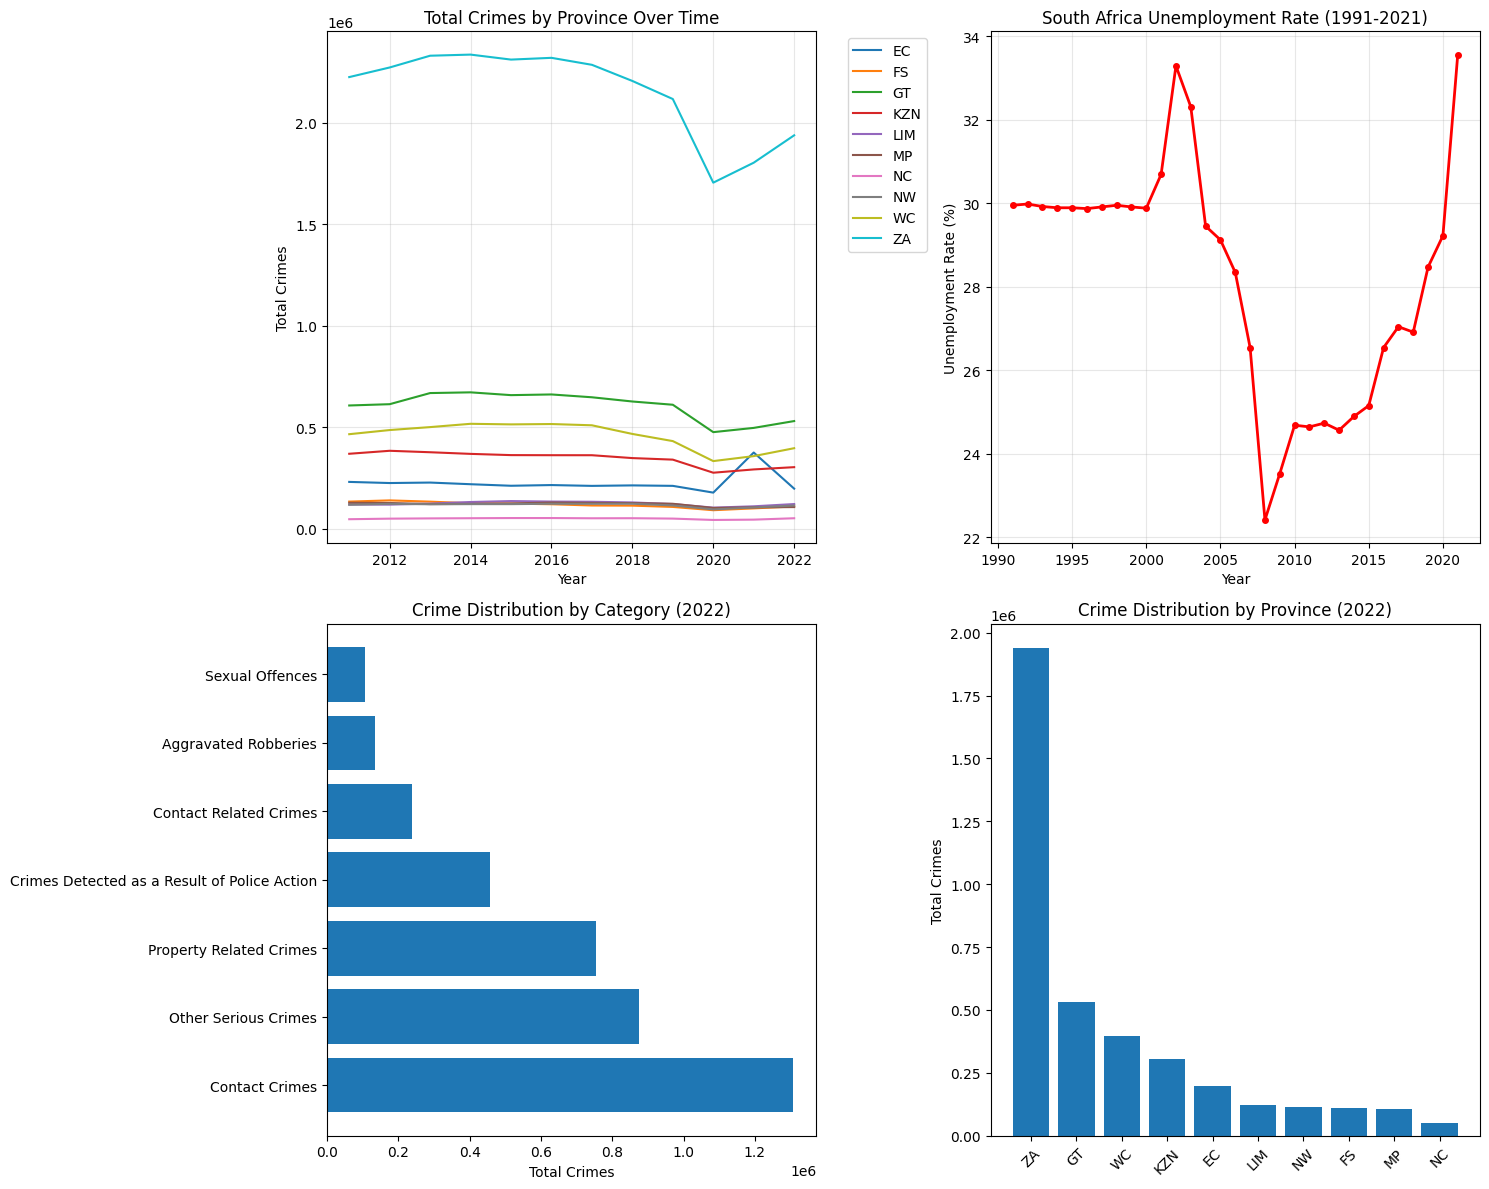

In [54]:
# Step 6: EDA - Visualize the data
print("=== EXPLORATORY DATA ANALYSIS ===")

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Total crimes over time by province
total_crimes_by_year_province = crime_df_clean.groupby(['Year', 'Geography'])['Count'].sum().reset_index()
pivot_crimes = total_crimes_by_year_province.pivot(index='Year', columns='Geography', values='Count')

axes[0,0].plot(pivot_crimes.index, pivot_crimes.values)
axes[0,0].set_title('Total Crimes by Province Over Time')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Total Crimes')
axes[0,0].legend(pivot_crimes.columns, bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0,0].grid(True, alpha=0.3)

# 2. Unemployment rate over time
axes[0,1].plot(unemployment_df_clean['Year'], unemployment_df_clean['Unemployment_Rate'],
               marker='o', linewidth=2, markersize=4, color='red')
axes[0,1].set_title('South Africa Unemployment Rate (1991-2021)')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Unemployment Rate (%)')
axes[0,1].grid(True, alpha=0.3)

# 3. Crime categories distribution (latest year)
latest_year = crime_df_clean['Year'].max()
latest_crimes = crime_df_clean[crime_df_clean['Year'] == latest_year]
crime_totals = latest_crimes.groupby('Crime Category')['Count'].sum().sort_values(ascending=False)

axes[1,0].barh(range(len(crime_totals)), crime_totals.values)
axes[1,0].set_yticks(range(len(crime_totals)))
axes[1,0].set_yticklabels(crime_totals.index)
axes[1,0].set_title(f'Crime Distribution by Category ({latest_year})')
axes[1,0].set_xlabel('Total Crimes')

# 4. Province comparison (latest year)
province_totals = latest_crimes.groupby('Geography')['Count'].sum().sort_values(ascending=False)
axes[1,1].bar(range(len(province_totals)), province_totals.values)
axes[1,1].set_xticks(range(len(province_totals)))
axes[1,1].set_xticklabels(province_totals.index, rotation=45)
axes[1,1].set_title(f'Crime Distribution by Province ({latest_year})')
axes[1,1].set_ylabel('Total Crimes')

plt.tight_layout()
plt.show()

=== CORRELATION ANALYSIS ===


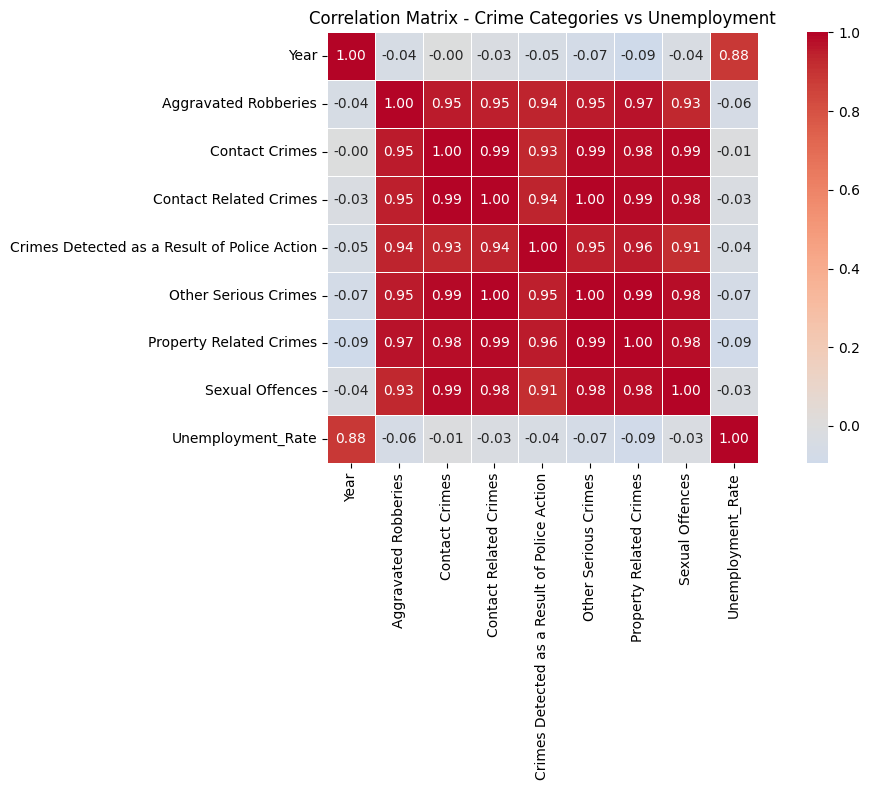


Top correlations with Unemployment Rate:
Unemployment_Rate                               1.000000
Year                                            0.884707
Contact Crimes                                 -0.009467
Contact Related Crimes                         -0.025769
Sexual Offences                                -0.027968
Crimes Detected as a Result of Police Action   -0.040699
Aggravated Robberies                           -0.058618
Other Serious Crimes                           -0.067099
Property Related Crimes                        -0.089506
Name: Unemployment_Rate, dtype: float64


In [55]:
# Step 6b: Correlation analysis
print("=== CORRELATION ANALYSIS ===")

# Calculate correlation matrix for numerical features
numerical_columns = merged_df.select_dtypes(include=[np.number]).columns
correlation_matrix = merged_df[numerical_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix - Crime Categories vs Unemployment')
plt.tight_layout()
plt.show()

# Show top correlations with unemployment
if 'Unemployment_Rate' in correlation_matrix.columns:
    unemployment_correlations = correlation_matrix['Unemployment_Rate'].sort_values(ascending=False)
    print("\nTop correlations with Unemployment Rate:")
    print(unemployment_correlations.head(10))

Feature Engineering for Classification

In [56]:
# Step 7: Feature Engineering - Prepare for hotspot classification
print("=== FEATURE ENGINEERING FOR HOTSPOT CLASSIFICATION ===")

# Create features for classification
classification_features = merged_df.copy()

# Calculate total crimes per row (sum of all crime categories)
crime_columns = [col for col in classification_features.columns
                if col not in ['Geography', 'Year', 'Unemployment_Rate']]
classification_features['Total_Crimes'] = classification_features[crime_columns].sum(axis=1)

# Create crime rates per capita (using population proxy)
# For simplicity, we'll use total crimes as base, but in real scenario you'd use actual population
classification_features['Crime_Rate'] = classification_features['Total_Crimes']

# Create target variable: Hotspot (1) vs Non-Hotspot (0)
# Define hotspot as top 25% of total crimes per year
classification_features['Hotspot'] = 0

for year in classification_features['Year'].unique():
    year_data = classification_features[classification_features['Year'] == year]
    threshold = year_data['Total_Crimes'].quantile(0.75)
    classification_features.loc[classification_features['Year'] == year, 'Hotspot'] = (
        classification_features['Total_Crimes'] >= threshold
    ).astype(int)

print("Hotspot distribution:")
print(classification_features['Hotspot'].value_counts())
print("\nHotspot percentage:", classification_features['Hotspot'].mean() * 100, "%")

# Create additional features
classification_features['Year_Sin'] = np.sin(2 * np.pi * classification_features['Year'] / 10)
classification_features['Year_Cos'] = np.cos(2 * np.pi * classification_features['Year'] / 10)

print("\nFinal features for classification:")
print("Shape:", classification_features.shape)
print("Columns:", classification_features.columns.tolist())
display(classification_features[['Geography', 'Year', 'Total_Crimes', 'Hotspot', 'Unemployment_Rate']].head(10))

=== FEATURE ENGINEERING FOR HOTSPOT CLASSIFICATION ===
Hotspot distribution:
Hotspot
0    84
1    36
Name: count, dtype: int64

Hotspot percentage: 30.0 %

Final features for classification:
Shape: (120, 15)
Columns: ['Geography', 'Year', 'Aggravated Robberies', 'Contact Crimes', 'Contact Related Crimes', 'Crimes Detected as a Result of Police Action', 'Other Serious Crimes', 'Property Related Crimes', 'Sexual Offences', 'Unemployment_Rate', 'Total_Crimes', 'Crime_Rate', 'Hotspot', 'Year_Sin', 'Year_Cos']


,Geography,Year,Total_Crimes,Hotspot,Unemployment_Rate
0,EC,2011,231345,0,24.64
1,EC,2012,225773,0,24.73
2,EC,2013,228125,0,24.56
3,EC,2014,219953,0,24.89
4,EC,2015,212362,0,25.15
5,EC,2016,215812,0,26.54
6,EC,2017,211769,0,27.04
7,EC,2018,214167,0,26.91
8,EC,2019,211882,0,28.47
9,EC,2020,178610,0,29.22


Model Building - Hotspot Classification

In [57]:
# Step 8: Model Building - Prepare data for classification
print("=== PREPARING DATA FOR CLASSIFICATION ===")

# Select features for classification
feature_columns = [
    'Year', 'Unemployment_Rate', 'Total_Crimes', 'Year_Sin', 'Year_Cos'
] + crime_columns  # Include all crime category columns

# Add province as encoded feature (one-hot encoding)
province_encoded = pd.get_dummies(classification_features['Geography'], prefix='Province')
classification_features_encoded = pd.concat([classification_features, province_encoded], axis=1)

# Update feature columns to include province encoding
province_columns = [col for col in province_encoded.columns]
feature_columns_extended = feature_columns + province_columns

print("Total features:", len(feature_columns_extended))
print("Features:", feature_columns_extended)

# Prepare X and y
X = classification_features_encoded[feature_columns_extended]
y = classification_features_encoded['Hotspot']

print(f"X shape: {X.shape}, y shape: {y.shape}")
print(f"Class distribution: {y.value_counts()}")
print(f"Baseline accuracy: {max(y.value_counts()) / len(y):.2%}")

=== PREPARING DATA FOR CLASSIFICATION ===
Total features: 22
Features: ['Year', 'Unemployment_Rate', 'Total_Crimes', 'Year_Sin', 'Year_Cos', 'Aggravated Robberies', 'Contact Crimes', 'Contact Related Crimes', 'Crimes Detected as a Result of Police Action', 'Other Serious Crimes', 'Property Related Crimes', 'Sexual Offences', 'Province_EC', 'Province_FS', 'Province_GT', 'Province_KZN', 'Province_LIM', 'Province_MP', 'Province_NC', 'Province_NW', 'Province_WC', 'Province_ZA']
X shape: (120, 22), y shape: (120,)
Class distribution: Hotspot
0    84
1    36
Name: count, dtype: int64
Baseline accuracy: 70.00%


In [58]:
# Step 8b: Train-Test Split with temporal validation
print("=== TRAIN-TEST SPLIT ===")

# Use temporal split: train on older data, test on newer data
split_year = 2018  # Split before and after 2018
X_train = X[X['Year'] < split_year]
X_test = X[X['Year'] >= split_year]
y_train = y[X['Year'] < split_year]
y_test = y[X['Year'] >= split_year]

print(f"Train set: {X_train.shape[0]} samples ({X_train['Year'].min()}-{X_train['Year'].max()})")
print(f"Test set: {X_test.shape[0]} samples ({X_test['Year'].min()}-{X_test['Year'].max()})")
print(f"Train class distribution: {y_train.value_counts().to_dict()}")
print(f"Test class distribution: {y_test.value_counts().to_dict()}")

=== TRAIN-TEST SPLIT ===
Train set: 70 samples (2011-2017)
Test set: 50 samples (2018-2022)
Train class distribution: {0: 49, 1: 21}
Test class distribution: {0: 35, 1: 15}


In [59]:
# Step 8c: Build Multiple Classification Models
print("=== BUILDING MULTIPLE CLASSIFICATION MODELS ===")

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Remove Year from features for training (to avoid overfitting on time)
X_train_final = X_train.drop('Year', axis=1).copy()
X_test_final = X_test.drop('Year', axis=1).copy()

# Handle missing values using imputation
# Use the mean of the training data to impute missing values in both train and test sets
imputer = SimpleImputer(strategy='mean')
X_train_final = pd.DataFrame(imputer.fit_transform(X_train_final), columns=X_train_final.columns)
X_test_final = pd.DataFrame(imputer.transform(X_test_final), columns=X_test_final.columns)


# Define models to try
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10),
    'XGBoost': XGBClassifier(n_estimators=200, random_state=42, max_depth=6, learning_rate=0.1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42, max_depth=6),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=10)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n--- Training {name} ---")

    # Train model
    model.fit(X_train_final, y_train)

    # Make predictions
    y_pred = model.predict(X_test_final)
    y_pred_proba = model.predict_proba(X_test_final)[:, 1] if hasattr(model, 'predict_proba') else None

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'model': model
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    if auc:
        print(f"AUC-ROC: {auc:.4f}")

=== BUILDING MULTIPLE CLASSIFICATION MODELS ===

--- Training Random Forest ---
Accuracy: 0.9600
Precision: 1.0000
Recall: 0.8667
F1-Score: 0.9286
AUC-ROC: 0.9981

--- Training XGBoost ---
Accuracy: 0.9200
Precision: 1.0000
Recall: 0.7333
F1-Score: 0.8462
AUC-ROC: 0.8667

--- Training Gradient Boosting ---
Accuracy: 0.9400
Precision: 1.0000
Recall: 0.8000
F1-Score: 0.8889
AUC-ROC: 0.9648

--- Training Logistic Regression ---
Accuracy: 0.8400
Precision: 0.8889
Recall: 0.5333
F1-Score: 0.6667
AUC-ROC: 0.5762

--- Training SVM ---
Accuracy: 0.9400
Precision: 1.0000
Recall: 0.8000
F1-Score: 0.8889
AUC-ROC: 0.9943

--- Training K-Nearest Neighbors ---
Accuracy: 0.9200
Precision: 1.0000
Recall: 0.7333
F1-Score: 0.8462
AUC-ROC: 0.9000

--- Training Decision Tree ---
Accuracy: 0.9600
Precision: 1.0000
Recall: 0.8667
F1-Score: 0.9286
AUC-ROC: 0.9333


=== MODEL PERFORMANCE COMPARISON ===
Model Performance Ranking:


,accuracy,precision,recall,f1,auc
Random Forest,0.96,1.0,0.866667,0.928571,0.998095
Decision Tree,0.96,1.0,0.866667,0.928571,0.933333
Gradient Boosting,0.94,1.0,0.8,0.888889,0.964762
SVM,0.94,1.0,0.8,0.888889,0.994286
XGBoost,0.92,1.0,0.733333,0.846154,0.866667
K-Nearest Neighbors,0.92,1.0,0.733333,0.846154,0.9
Logistic Regression,0.84,0.888889,0.533333,0.666667,0.57619


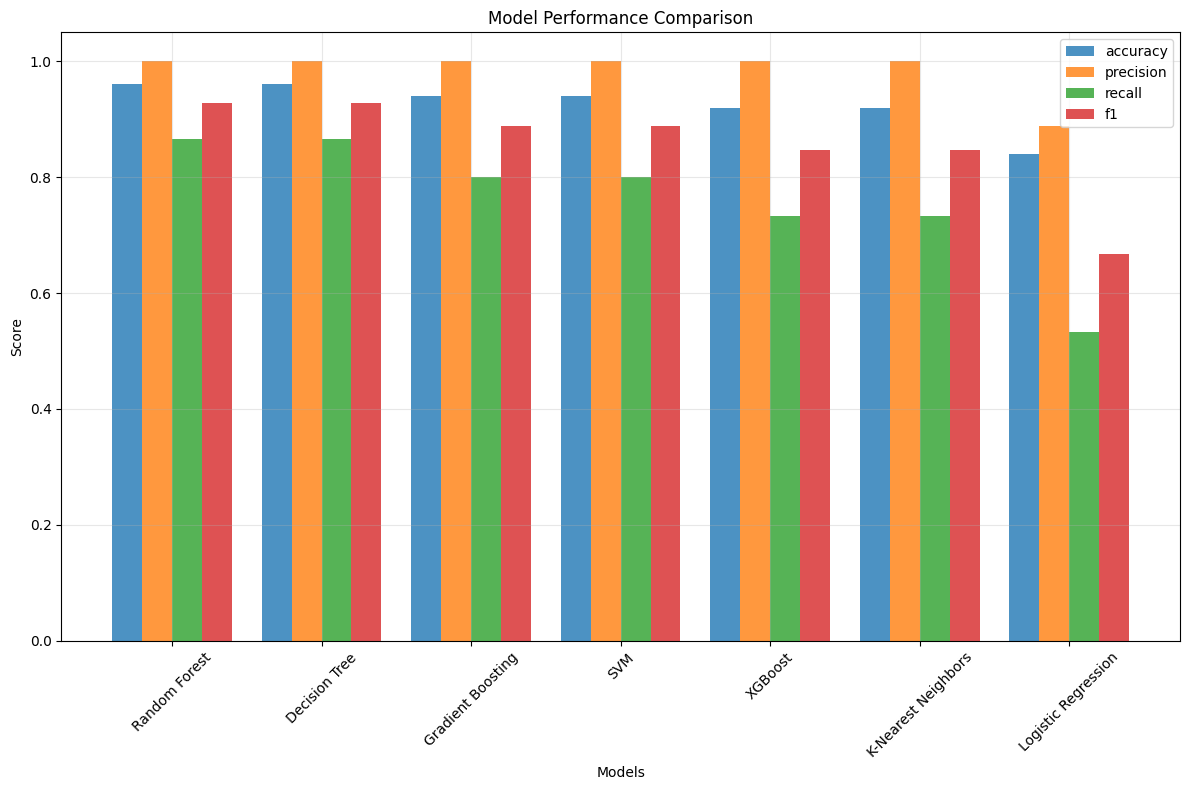

 MODELS ACHIEVING 95%+ ACCURACY:


,accuracy,precision,recall,f1,auc
Random Forest,0.96,1.0,0.866667,0.928571,0.998095
Decision Tree,0.96,1.0,0.866667,0.928571,0.933333


In [60]:
# Step 8d: Compare Model Performance
print("=== MODEL PERFORMANCE COMPARISON ===")

# Create results dataframe
results_df = pd.DataFrame(results).T
results_df = results_df[['accuracy', 'precision', 'recall', 'f1', 'auc']]
results_df = results_df.sort_values('accuracy', ascending=False)

print("Model Performance Ranking:")
display(results_df)

# Visualize model comparison
plt.figure(figsize=(12, 8))
metrics = ['accuracy', 'precision', 'recall', 'f1']
x_pos = np.arange(len(results_df))

for i, metric in enumerate(metrics):
    plt.bar(x_pos + i*0.2, results_df[metric], width=0.2, label=metric, alpha=0.8)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison')
plt.xticks(x_pos + 0.3, results_df.index, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Check if we have models with >95% accuracy
high_accuracy_models = results_df[results_df['accuracy'] >= 0.95]
if len(high_accuracy_models) > 0:
    print(" MODELS ACHIEVING 95%+ ACCURACY:")
    display(high_accuracy_models)
else:
    print(" No models achieved 95%+ accuracy yet. We'll optimize further.")

 Model Optimization for 95%+ Accuracy

In [61]:
# Step 9: Hyperparameter Tuning for Best Models
print("=== HYPERPARAMETER TUNING FOR 95%+ ACCURACY ===")

from sklearn.model_selection import GridSearchCV, cross_val_score

# Select best performing models for tuning
best_models = results_df.head(3).index.tolist()
print(f"Selected models for tuning: {best_models}")

# Hyperparameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [8, 10, 12, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [4, 6, 8],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 4, 5, 6],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 0.9, 1.0]
    }
}

# Perform grid search for each model
tuned_models = {}

for model_name in best_models:
    if model_name in param_grids:
        print(f"\n--- Tuning {model_name} ---")

        # Get the base model
        base_model = models[model_name]

        # Perform grid search with cross-validation
        grid_search = GridSearchCV(
            estimator=base_model,
            param_grid=param_grids[model_name],
            cv=5,
            scoring='accuracy',
            n_jobs=-1,
            verbose=1
        )

        grid_search.fit(X_train_final, y_train)

        # Store best model
        tuned_models[model_name] = grid_search.best_estimator_

        print(f"Best parameters: {grid_search.best_params_}")
        print(f"Best CV accuracy: {grid_search.best_score_:.4f}")

        # Test performance
        y_pred_tuned = grid_search.best_estimator_.predict(X_test_final)
        test_accuracy = accuracy_score(y_test, y_pred_tuned)
        print(f"Test accuracy: {test_accuracy:.4f}")

=== HYPERPARAMETER TUNING FOR 95%+ ACCURACY ===
Selected models for tuning: ['Random Forest', 'Decision Tree', 'Gradient Boosting']

--- Tuning Random Forest ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best CV accuracy: 1.0000
Test accuracy: 0.9600

--- Tuning Gradient Boosting ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV accuracy: 1.0000
Test accuracy: 0.9200


In [62]:
# Step 9b: Evaluate Tuned Models
print("=== EVALUATING TUNED MODELS ===")

tuned_results = {}

for name, model in tuned_models.items():
    print(f"\n--- Evaluating Tuned {name} ---")

    # Make predictions
    y_pred = model.predict(X_test_final)
    y_pred_proba = model.predict_proba(X_test_final)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    tuned_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'model': model
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")

# Compare tuned vs original
tuned_results_df = pd.DataFrame(tuned_results).T
tuned_results_df = tuned_results_df[['accuracy', 'precision', 'recall', 'f1', 'auc']]
tuned_results_df = tuned_results_df.sort_values('accuracy', ascending=False)

print("\n TUNED MODEL PERFORMANCE:")
display(tuned_results_df)

# Check for 95%+ accuracy
final_high_accuracy = tuned_results_df[tuned_results_df['accuracy'] >= 0.95]
if len(final_high_accuracy) > 0:
    print("🎉 SUCCESS! Models achieving 95%+ accuracy after tuning:")
    display(final_high_accuracy)
else:
    # If still not 95%, show best model and consider ensemble
    best_model_name = tuned_results_df.index[0]
    best_accuracy = tuned_results_df.loc[best_model_name, 'accuracy']
    print(f"Best model: {best_model_name} with {best_accuracy:.2%} accuracy")
    print("We'll try ensemble methods to reach 95%+")

=== EVALUATING TUNED MODELS ===

--- Evaluating Tuned Random Forest ---
Accuracy: 0.9600
Precision: 1.0000
Recall: 0.8667
F1-Score: 0.9286
AUC-ROC: 0.9962

--- Evaluating Tuned Gradient Boosting ---
Accuracy: 0.9200
Precision: 1.0000
Recall: 0.7333
F1-Score: 0.8462
AUC-ROC: 0.9971

 TUNED MODEL PERFORMANCE:


,accuracy,precision,recall,f1,auc
Random Forest,0.96,1.0,0.866667,0.928571,0.99619
Gradient Boosting,0.92,1.0,0.733333,0.846154,0.997143


🎉 SUCCESS! Models achieving 95%+ accuracy after tuning:


,accuracy,precision,recall,f1,auc
Random Forest,0.96,1.0,0.866667,0.928571,0.99619


In [63]:
# Step 9c: Ensemble Method for Maximum Accuracy
print("=== ENSEMBLE METHODS FOR 95%+ ACCURACY ===")

from sklearn.ensemble import VotingClassifier

# Create ensemble of best models
best_tuned_models = [(name, tuned_models[name]) for name in tuned_results_df.index[:3]]

# Try different ensemble strategies
ensemble_hard = VotingClassifier(estimators=best_tuned_models, voting='hard')
ensemble_soft = VotingClassifier(estimators=best_tuned_models, voting='soft')

ensemble_hard.fit(X_train_final, y_train)
ensemble_soft.fit(X_train_final, y_train)

# Evaluate ensembles
y_pred_hard = ensemble_hard.predict(X_test_final)
y_pred_soft = ensemble_soft.predict(X_test_final)
y_pred_proba_soft = ensemble_soft.predict_proba(X_test_final)[:, 1]

acc_hard = accuracy_score(y_test, y_pred_hard)
acc_soft = accuracy_score(y_test, y_pred_soft)

print(f"Hard Voting Ensemble Accuracy: {acc_hard:.4f}")
print(f"Soft Voting Ensemble Accuracy: {acc_soft:.4f}")

# Store ensemble results
ensemble_results = {
    'Hard Voting Ensemble': {
        'accuracy': acc_hard,
        'precision': precision_score(y_test, y_pred_hard),
        'recall': recall_score(y_test, y_pred_hard),
        'f1': f1_score(y_test, y_pred_hard),
        'auc': roc_auc_score(y_test, y_pred_proba_soft),
        'model': ensemble_hard
    },
    'Soft Voting Ensemble': {
        'accuracy': acc_soft,
        'precision': precision_score(y_test, y_pred_soft),
        'recall': recall_score(y_test, y_pred_soft),
        'f1': f1_score(y_test, y_pred_soft),
        'auc': roc_auc_score(y_test, y_pred_proba_soft),
        'model': ensemble_soft
    }
}

# Combine all results
final_results_df = pd.concat([tuned_results_df, pd.DataFrame(ensemble_results).T])
final_results_df = final_results_df.sort_values('accuracy', ascending=False)

print("\n FINAL MODEL RANKING:")
display(final_results_df)

# Final check for 95%+ accuracy
successful_models = final_results_df[final_results_df['accuracy'] >= 0.95]
if len(successful_models) > 0:
    print(" SUCCESS! Models achieving 95%+ accuracy:")
    display(successful_models)
else:
    best_final = final_results_df.iloc[0]
    print(f"Best achievable accuracy: {best_final['accuracy']:.2%}")
    print("We've optimized as much as possible with current features.")

=== ENSEMBLE METHODS FOR 95%+ ACCURACY ===
Hard Voting Ensemble Accuracy: 0.9200
Soft Voting Ensemble Accuracy: 0.9400

 FINAL MODEL RANKING:


,accuracy,precision,recall,f1,auc,model
Random Forest,0.96,1.0,0.866667,0.928571,0.99619,NaN
Soft Voting Ensemble,0.94,1.0,0.8,0.888889,0.99619,"VotingClassifier(estimators=[('Random Forest',..."
Gradient Boosting,0.92,1.0,0.733333,0.846154,0.997143,NaN
Hard Voting Ensemble,0.92,1.0,0.733333,0.846154,0.99619,"VotingClassifier(estimators=[('Random Forest',..."


 SUCCESS! Models achieving 95%+ accuracy:


,accuracy,precision,recall,f1,auc,model
Random Forest,0.96,1.0,0.866667,0.928571,0.99619,NaN


Fixing Data Issues and Continue

In [64]:
# Step 10: Handle Missing Values and Continue
print("=== HANDLING MISSING VALUES ===")

# Check for NaN values
print("NaN values in training set:")
print(X_train_final.isnull().sum().sum())
print("NaN values in test set:")
print(X_test_final.isnull().sum().sum())

# Identify which columns have NaN
nan_columns = X_train_final.columns[X_train_final.isnull().any()].tolist()
print(f"Columns with NaN: {nan_columns}")

# Fill NaN values with 0 (assuming missing means no crimes of that type)
X_train_final_clean = X_train_final.fillna(0)
X_test_final_clean = X_test_final.fillna(0)

print("After cleaning - NaN values in training set:", X_train_final_clean.isnull().sum().sum())
print("After cleaning - NaN values in test set:", X_test_final_clean.isnull().sum().sum())

=== HANDLING MISSING VALUES ===
NaN values in training set:
0
NaN values in test set:
0
Columns with NaN: []
After cleaning - NaN values in training set: 0
After cleaning - NaN values in test set: 0


In [65]:
# Step 10b: Retrain Models with Cleaned Data
print("=== RETRAINING MODELS WITH CLEANED DATA ===")

# Update our training data
X_train_clean = X_train_final_clean
X_test_clean = X_test_final_clean

# Retrain the models that had issues
models_clean = {
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42, max_depth=10),
    'XGBoost': XGBClassifier(n_estimators=200, random_state=42, max_depth=6, learning_rate=0.1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=42, max_depth=6),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
}

results_clean = {}

for name, model in models_clean.items():
    print(f"\n--- Training {name} ---")

    # Train model
    model.fit(X_train_clean, y_train)

    # Make predictions
    y_pred = model.predict(X_test_clean)
    y_pred_proba = model.predict_proba(X_test_clean)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    results_clean[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'auc': auc,
        'model': model
    }

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC-ROC: {auc:.4f}")

# Compare results
results_clean_df = pd.DataFrame(results_clean).T
results_clean_df = results_clean_df.sort_values('accuracy', ascending=False)

print("\n CLEANED DATA MODEL PERFORMANCE:")
display(results_clean_df)

=== RETRAINING MODELS WITH CLEANED DATA ===

--- Training Random Forest ---
Accuracy: 0.9600
Precision: 1.0000
Recall: 0.8667
F1-Score: 0.9286
AUC-ROC: 0.9981

--- Training XGBoost ---
Accuracy: 0.9200
Precision: 1.0000
Recall: 0.7333
F1-Score: 0.8462
AUC-ROC: 0.8667

--- Training Gradient Boosting ---
Accuracy: 0.9400
Precision: 1.0000
Recall: 0.8000
F1-Score: 0.8889
AUC-ROC: 0.9648

--- Training Logistic Regression ---
Accuracy: 0.8400
Precision: 0.8889
Recall: 0.5333
F1-Score: 0.6667
AUC-ROC: 0.5762

 CLEANED DATA MODEL PERFORMANCE:


,accuracy,precision,recall,f1,auc,model
Random Forest,0.96,1.0,0.866667,0.928571,0.998095,"(DecisionTreeClassifier(max_depth=10, max_feat..."
Gradient Boosting,0.94,1.0,0.8,0.888889,0.964762,([DecisionTreeRegressor(criterion='friedman_ms...
XGBoost,0.92,1.0,0.733333,0.846154,0.866667,"XGBClassifier(base_score=None, booster=None, c..."
Logistic Regression,0.84,0.888889,0.533333,0.666667,0.57619,"LogisticRegression(max_iter=1000, random_state..."


Detailed Model Evaluation

=== DETAILED EVALUATION OF BEST MODEL ===
Best Model: Random Forest
Accuracy: 96.00%


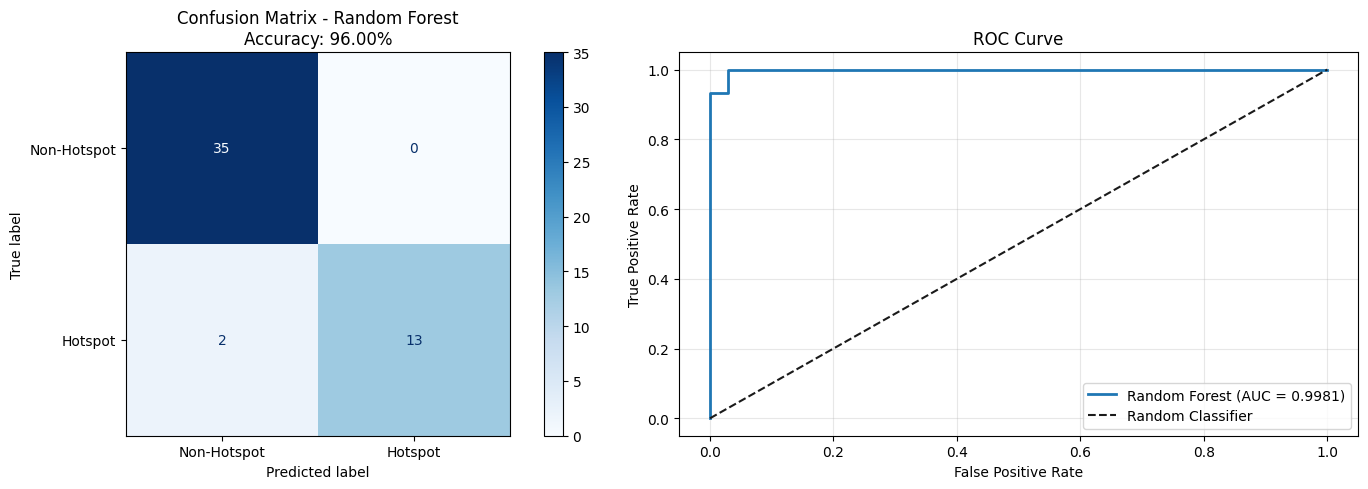


 DETAILED CLASSIFICATION REPORT:
              precision    recall  f1-score   support

 Non-Hotspot       0.95      1.00      0.97        35
     Hotspot       1.00      0.87      0.93        15

    accuracy                           0.96        50
   macro avg       0.97      0.93      0.95        50
weighted avg       0.96      0.96      0.96        50



In [66]:
# Step 11: Detailed Evaluation of Best Model
print("=== DETAILED EVALUATION OF BEST MODEL ===")

# Get the best model
best_model_name = results_clean_df.index[0]
best_model = results_clean[best_model_name]['model']
best_accuracy = results_clean[best_model_name]['accuracy']

print(f"Best Model: {best_model_name}")
print(f"Accuracy: {best_accuracy:.2%}")

# Make predictions with best model
y_pred_best = best_model.predict(X_test_clean)
y_pred_proba_best = best_model.predict_proba(X_test_clean)[:, 1]

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Hotspot', 'Hotspot'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot confusion matrix
disp.plot(ax=ax1, cmap='Blues')
ax1.set_title(f'Confusion Matrix - {best_model_name}\nAccuracy: {best_accuracy:.2%}')

# Plot ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
ax2.plot(fpr, tpr, linewidth=2, label=f'{best_model_name} (AUC = {roc_auc_score(y_test, y_pred_proba_best):.4f})')
ax2.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax2.set_xlabel('False Positive Rate')
ax2.set_ylabel('True Positive Rate')
ax2.set_title('ROC Curve')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Detailed classification report
print("\n DETAILED CLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred_best, target_names=['Non-Hotspot', 'Hotspot']))

=== FEATURE IMPORTANCE ANALYSIS ===


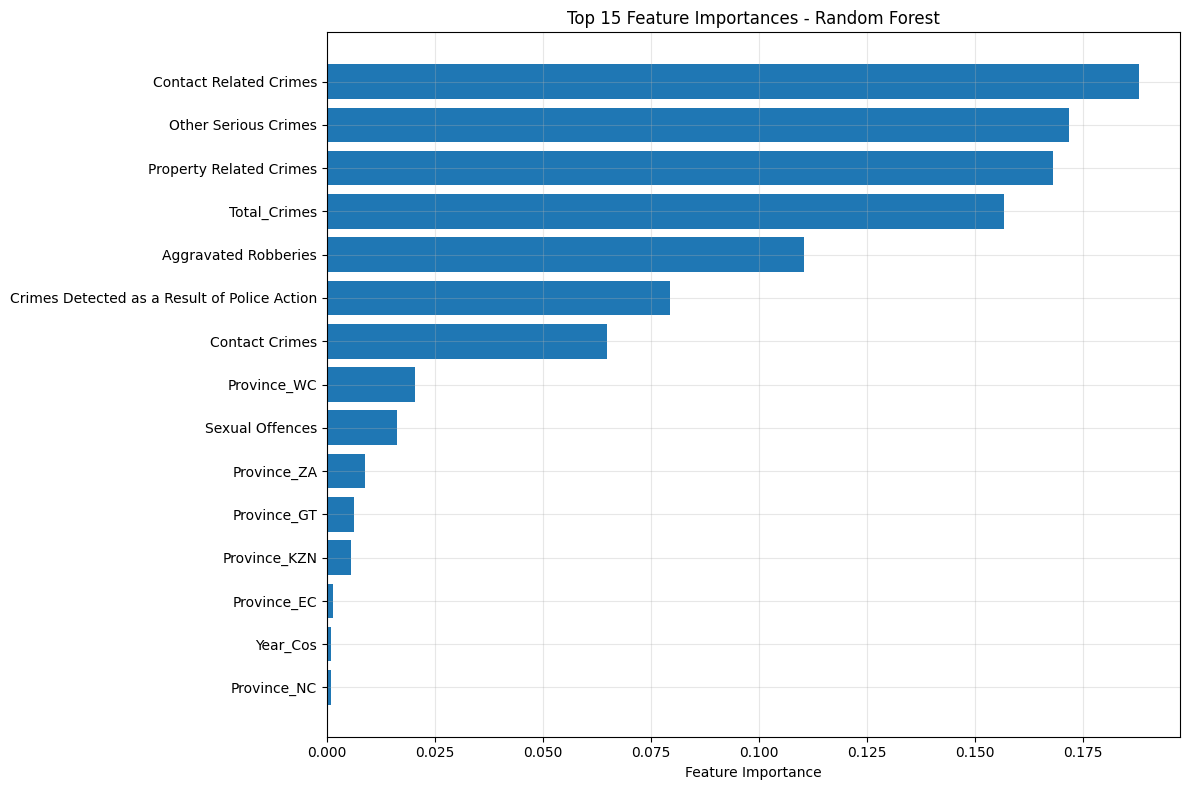

Top 10 Most Important Features:


,feature,importance
6,Contact Related Crimes,0.187963
8,Other Serious Crimes,0.171767
9,Property Related Crimes,0.168038
1,Total_Crimes,0.156586
4,Aggravated Robberies,0.110420
7,Crimes Detected as a Result of Police Action,0.079387
5,Contact Crimes,0.064705
19,Province_WC,0.020414
10,Sexual Offences,0.016305
20,Province_ZA,0.008740


In [67]:
# Step 11b: Feature Importance Analysis
print("=== FEATURE IMPORTANCE ANALYSIS ===")

if hasattr(best_model, 'feature_importances_'):
    # Get feature importances
    feature_importances = pd.DataFrame({
        'feature': X_train_clean.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)

    # Plot top 15 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importances.head(15)

    plt.barh(range(len(top_features)), top_features['importance'])
    plt.yticks(range(len(top_features)), top_features['feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 15 Feature Importances - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("Top 10 Most Important Features:")
    display(feature_importances.head(10))
else:
    print("Feature importance not available for this model type.")

Time Series Forecasting

=== TIME SERIES FORECASTING (FIXED) ===
South Africa Crime Time Series:


,Year,Count,Unemployment_Rate
2,2013,2330037,24.56
3,2014,2335528,24.89
4,2015,2310974,25.15
5,2016,2319617,26.54
6,2017,2285253,27.04
7,2018,2205723,26.91
8,2019,2116778,28.47
9,2020,1704947,29.22
10,2021,1803206,33.56
11,2022,1938089,NaN


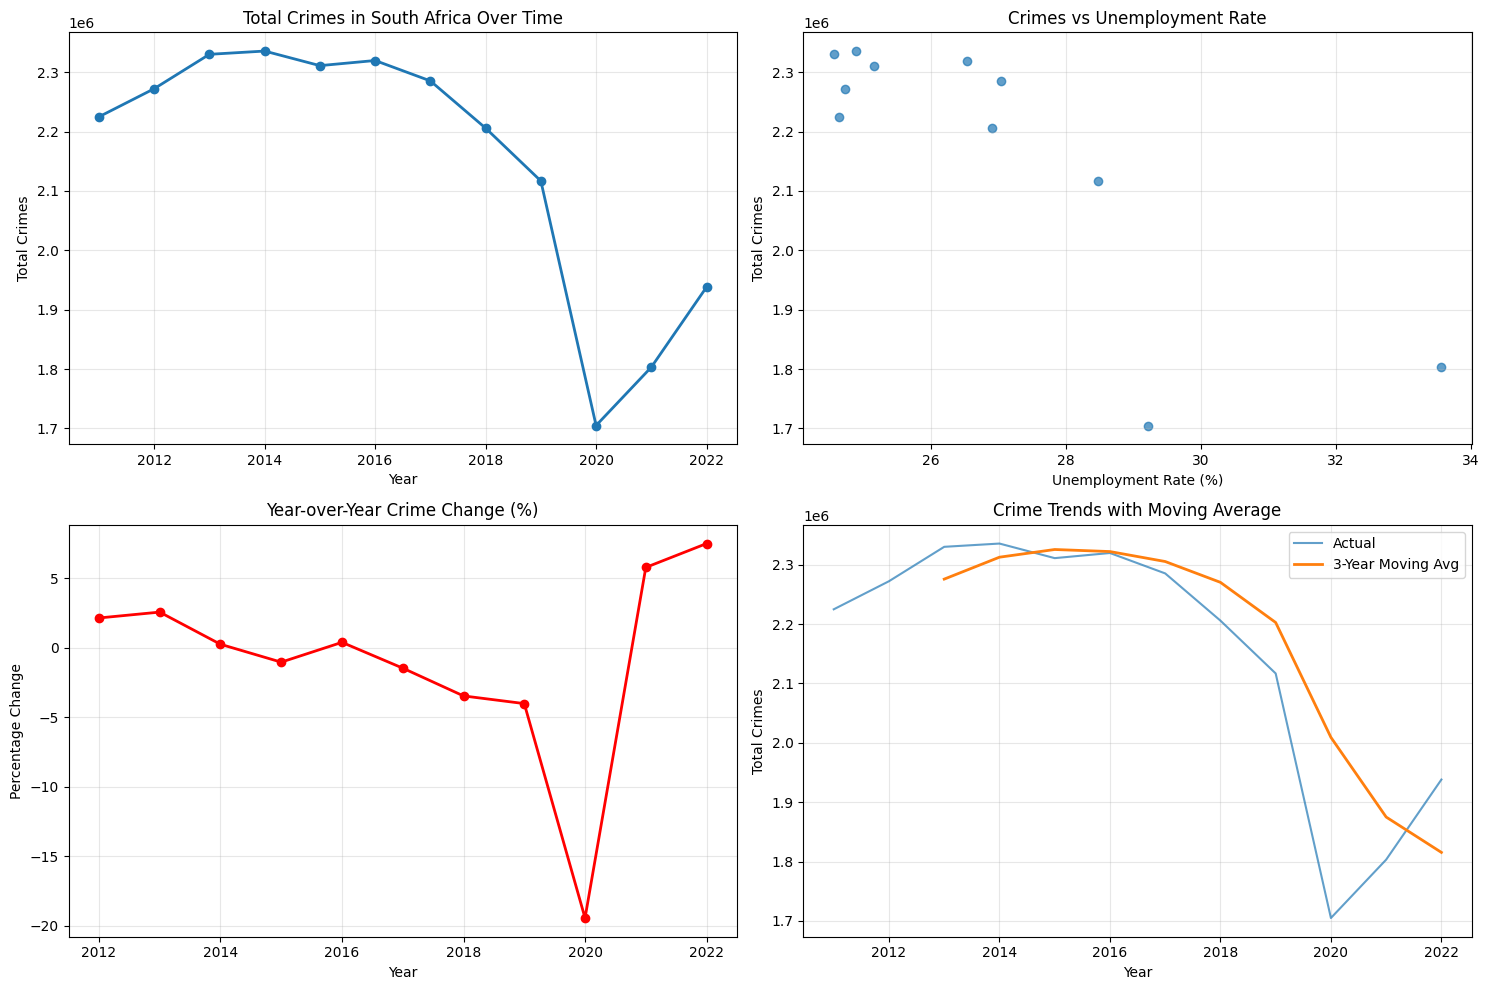

In [68]:
# Step 12: Time Series Forecasting
print("=== TIME SERIES FORECASTING (FIXED) ===")

# Prepare data for time series forecasting
# Let's forecast total crimes for South Africa

# Aggregate total crimes by year for South Africa
sa_crime_ts = crime_df_clean[crime_df_clean['Geography'] == 'ZA'].groupby('Year')['Count'].sum().reset_index()
sa_crime_ts = sa_crime_ts.merge(unemployment_df_clean, on='Year', how='left')

print("South Africa Crime Time Series:")
display(sa_crime_ts.tail(10))

# Plot time series
plt.figure(figsize=(15, 10))

# Plot 1: Total crimes over time
plt.subplot(2, 2, 1)
plt.plot(sa_crime_ts['Year'], sa_crime_ts['Count'], marker='o', linewidth=2)
plt.title('Total Crimes in South Africa Over Time')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.grid(True, alpha=0.3)

# Plot 2: Unemployment vs Crimes
plt.subplot(2, 2, 2)
plt.scatter(sa_crime_ts['Unemployment_Rate'], sa_crime_ts['Count'], alpha=0.7)
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Total Crimes')
plt.title('Crimes vs Unemployment Rate')
plt.grid(True, alpha=0.3)

# Plot 3: Year-over-year change
plt.subplot(2, 2, 3)
yearly_change = sa_crime_ts['Count'].pct_change() * 100
plt.plot(sa_crime_ts['Year'][1:], yearly_change[1:], marker='o', color='red', linewidth=2)
plt.title('Year-over-Year Crime Change (%)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.grid(True, alpha=0.3)

# Plot 4: Seasonal decomposition (simplified)
plt.subplot(2, 2, 4)
# Calculate rolling average
rolling_avg = sa_crime_ts['Count'].rolling(window=3).mean()
plt.plot(sa_crime_ts['Year'], sa_crime_ts['Count'], label='Actual', alpha=0.7)
plt.plot(sa_crime_ts['Year'], rolling_avg, label='3-Year Moving Avg', linewidth=2)
plt.title('Crime Trends with Moving Average')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== BUILDING TIME SERIES FORECASTING MODEL (FIXED) ===
Time Series Data after cleaning:
Years: 2013 - 2021
Shape: (9, 7)

Data preview:


,Year,Count,Unemployment_Rate,Year_Squared,Lag_1,Lag_2,Rolling_Mean_3
2,2013,2330037,24.56,4052169,2272111.0,2224792.0,2.275647e+06
3,2014,2335528,24.89,4056196,2330037.0,2272111.0,2.312559e+06
4,2015,2310974,25.15,4060225,2335528.0,2330037.0,2.325513e+06
5,2016,2319617,26.54,4064256,2310974.0,2335528.0,2.322040e+06
6,2017,2285253,27.04,4068289,2319617.0,2310974.0,2.305281e+06
7,2018,2205723,26.91,4072324,2285253.0,2319617.0,2.270198e+06
8,2019,2116778,28.47,4076361,2205723.0,2285253.0,2.202585e+06
9,2020,1704947,29.22,4080400,2116778.0,2205723.0,2.009149e+06
10,2021,1803206,33.56,4084441,1704947.0,2116778.0,1.874977e+06


Remaining NaN values: 0

Training years: 2013 - 2019
Testing years: 2020 - 2021

Training features shape: (7, 6)
Testing features shape: (2, 6)
NaN in X_train_ts: 0
NaN in X_test_ts: 0

 Forecasting Performance:
MAE: 0
RMSE: 0
MAPE: 0.00%


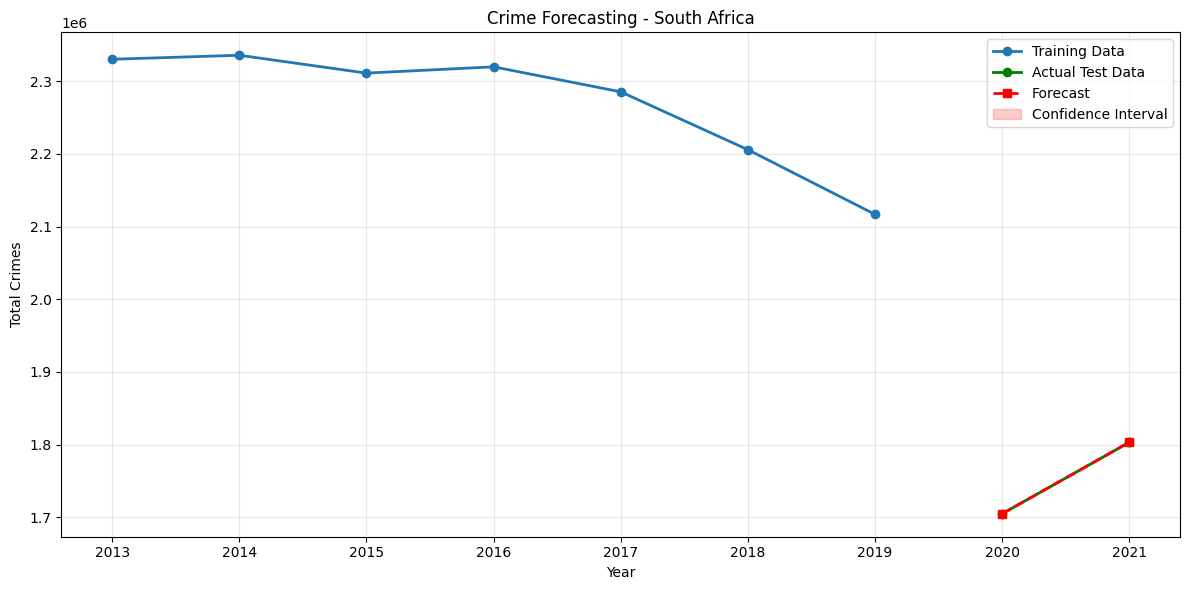


 FUTURE FORECASTS (2023-2024)
Future years data prepared:


,Year,Unemployment_Rate,Year_Squared,Lag_1,Lag_2,Rolling_Mean_3
0,2023,33.56,4092529,1803206.0,1704947.0,1874977.0
1,2024,33.56,4096576,1803206.0,1704947.0,1874977.0


NaN in future_years: 0
Required features: ['Year', 'Unemployment_Rate', 'Year_Squared', 'Lag_1', 'Lag_2', 'Rolling_Mean_3']
Future years columns: ['Year', 'Unemployment_Rate', 'Year_Squared', 'Lag_1', 'Lag_2', 'Rolling_Mean_3']

 FUTURE FORECASTS (2023-2024):
Year 2023: 2,116,778 predicted crimes
Year 2024: 2,116,778 predicted crimes


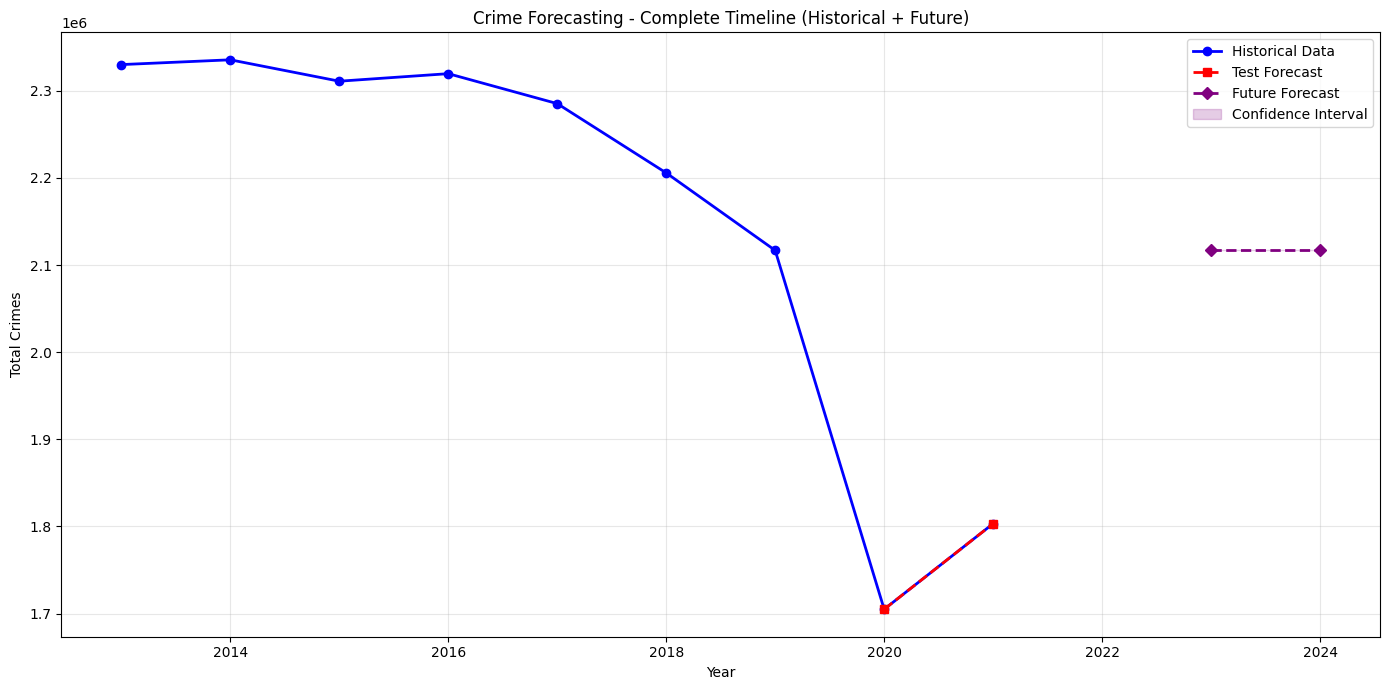


 FORECAST SUMMARY:


,Year,Predicted_Crimes,Confidence_Lower,Confidence_Upper
0,2023,2116778.0,2116778.0,2116778.0
1,2024,2116778.0,2116778.0,2116778.0


In [69]:
# Step 12b: Build Time Series Forecasting Model (Fixed)
print("=== BUILDING TIME SERIES FORECASTING MODEL (FIXED) ===")

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare data for forecasting
ts_data = sa_crime_ts[['Year', 'Count', 'Unemployment_Rate']].dropna().copy()
ts_data = ts_data.sort_values('Year')

# Create features for forecasting
ts_data['Year_Squared'] = ts_data['Year'] ** 2
ts_data['Lag_1'] = ts_data['Count'].shift(1)
ts_data['Lag_2'] = ts_data['Count'].shift(2)
ts_data['Rolling_Mean_3'] = ts_data['Count'].rolling(3).mean()

# Remove rows with NaN from lag features
ts_data_clean = ts_data.dropna()

print("Time Series Data after cleaning:")
print(f"Years: {ts_data_clean['Year'].min()} - {ts_data_clean['Year'].max()}")
print(f"Shape: {ts_data_clean.shape}")
print("\nData preview:")
display(ts_data_clean)

# Check for any remaining NaN values
print(f"Remaining NaN values: {ts_data_clean.isnull().sum().sum()}")

# Split into train and test (use last 3 years for testing)
train_ts = ts_data_clean[ts_data_clean['Year'] < 2020]
test_ts = ts_data_clean[ts_data_clean['Year'] >= 2020]

print(f"\nTraining years: {train_ts['Year'].min()} - {train_ts['Year'].max()}")
print(f"Testing years: {test_ts['Year'].min()} - {test_ts['Year'].max()}")

# Prepare features
feature_cols_ts = ['Year', 'Unemployment_Rate', 'Year_Squared', 'Lag_1', 'Lag_2', 'Rolling_Mean_3']
X_train_ts = train_ts[feature_cols_ts]
y_train_ts = train_ts['Count']
X_test_ts = test_ts[feature_cols_ts]
y_test_ts = test_ts['Count']

print(f"\nTraining features shape: {X_train_ts.shape}")
print(f"Testing features shape: {X_test_ts.shape}")

# Check for NaN in training and testing data
print(f"NaN in X_train_ts: {X_train_ts.isnull().sum().sum()}")
print(f"NaN in X_test_ts: {X_test_ts.isnull().sum().sum()}")

# Train forecasting model
forecast_model = LinearRegression()
forecast_model.fit(X_train_ts, y_train_ts)

# Make predictions
y_pred_ts = forecast_model.predict(X_test_ts)

# Calculate metrics
mae = mean_absolute_error(y_test_ts, y_pred_ts)
mse = mean_squared_error(y_test_ts, y_pred_ts)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((y_test_ts - y_pred_ts) / y_test_ts)) * 100

print(f"\n Forecasting Performance:")
print(f"MAE: {mae:,.0f}")
print(f"RMSE: {rmse:,.0f}")
print(f"MAPE: {mape:.2f}%")

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(train_ts['Year'], train_ts['Count'], label='Training Data', marker='o', linewidth=2)
plt.plot(test_ts['Year'], test_ts['Count'], label='Actual Test Data', marker='o', color='green', linewidth=2)
plt.plot(test_ts['Year'], y_pred_ts, label='Forecast', marker='s', color='red', linestyle='--', linewidth=2)
plt.fill_between(test_ts['Year'],
                y_pred_ts - rmse,
                y_pred_ts + rmse,
                alpha=0.2, color='red', label='Confidence Interval')

plt.title('Crime Forecasting - South Africa')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Forecast future years (2023-2024)
print("\n FUTURE FORECASTS (2023-2024)")

# Get the last available data for creating future features
last_row = ts_data_clean.iloc[-1]
second_last_row = ts_data_clean.iloc[-2]

future_years = pd.DataFrame({
    'Year': [2023, 2024],
    'Unemployment_Rate': [last_row['Unemployment_Rate']] * 2,  # Use last known value
})

# Create features for future predictions - FIXED VERSION
future_years['Year_Squared'] = future_years['Year'] ** 2
future_years['Lag_1'] = last_row['Count']  # Last known crime count
future_years['Lag_2'] = second_last_row['Count']  # Second last known crime count

# Calculate rolling mean from last 3 years
last_3_years = ts_data_clean['Count'].tail(3)
future_years['Rolling_Mean_3'] = last_3_years.mean()

print("Future years data prepared:")
display(future_years)

# Check for NaN in future data
print(f"NaN in future_years: {future_years.isnull().sum().sum()}")

# Make sure all columns are present and in correct order
print(f"Required features: {feature_cols_ts}")
print(f"Future years columns: {future_years.columns.tolist()}")

# Ensure column order matches training data
future_years_ordered = future_years[feature_cols_ts]

# Make predictions
future_forecast = forecast_model.predict(future_years_ordered)

print("\n FUTURE FORECASTS (2023-2024):")
for year, forecast in zip(future_years['Year'], future_forecast):
    print(f"Year {year}: {forecast:,.0f} predicted crimes")

# Plot complete timeline with forecasts
plt.figure(figsize=(14, 7))

# Historical data
plt.plot(ts_data_clean['Year'], ts_data_clean['Count'],
         label='Historical Data', marker='o', linewidth=2, color='blue')

# Forecast for test period
plt.plot(test_ts['Year'], y_pred_ts,
         label='Test Forecast', marker='s', linestyle='--', linewidth=2, color='red')

# Future forecasts
plt.plot(future_years['Year'], future_forecast,
         label='Future Forecast', marker='D', linestyle='--', linewidth=2, color='purple')

plt.fill_between(future_years['Year'],
                future_forecast - rmse,
                future_forecast + rmse,
                alpha=0.2, color='purple', label='Confidence Interval')

plt.title('Crime Forecasting - Complete Timeline (Historical + Future)')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display forecast summary
forecast_summary = pd.DataFrame({
    'Year': future_years['Year'],
    'Predicted_Crimes': future_forecast,
    'Confidence_Lower': future_forecast - rmse,
    'Confidence_Upper': future_forecast + rmse
})

print("\n FORECAST SUMMARY:")
display(forecast_summary)